In [1]:
import numpy as np

In [2]:
from dtw_mean import dtw, ssg
from loaddataset import loaddataset

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
current_palette = sns.color_palette('tab10',10)

In [5]:
EXTdatasetname="ArrowHead"
EXTdataset = loaddataset(name=EXTdatasetname,train_suffix="_EXP10_TRAIN")

Dataset ArrowHead has been loaded with class distribution of: Counter({1.0: 126, 2.0: 121, 0.0: 99}), test:175


In [6]:
ORGdatasetname="ArrowHead"
ORGdataset = loaddataset(ORGdatasetname)

Dataset ArrowHead has been loaded with class distribution of: Counter({0.0: 12, 1.0: 12, 2.0: 12}), test:175


In [7]:
ORGdataset.class_dist

Counter({0.0: 12, 1.0: 12, 2.0: 12})

In [8]:
ORGdataset.N, ORGdataset.T, ORGdataset.K, ORGdataset.class_dist

(36, 251, 3, Counter({0.0: 12, 1.0: 12, 2.0: 12}))

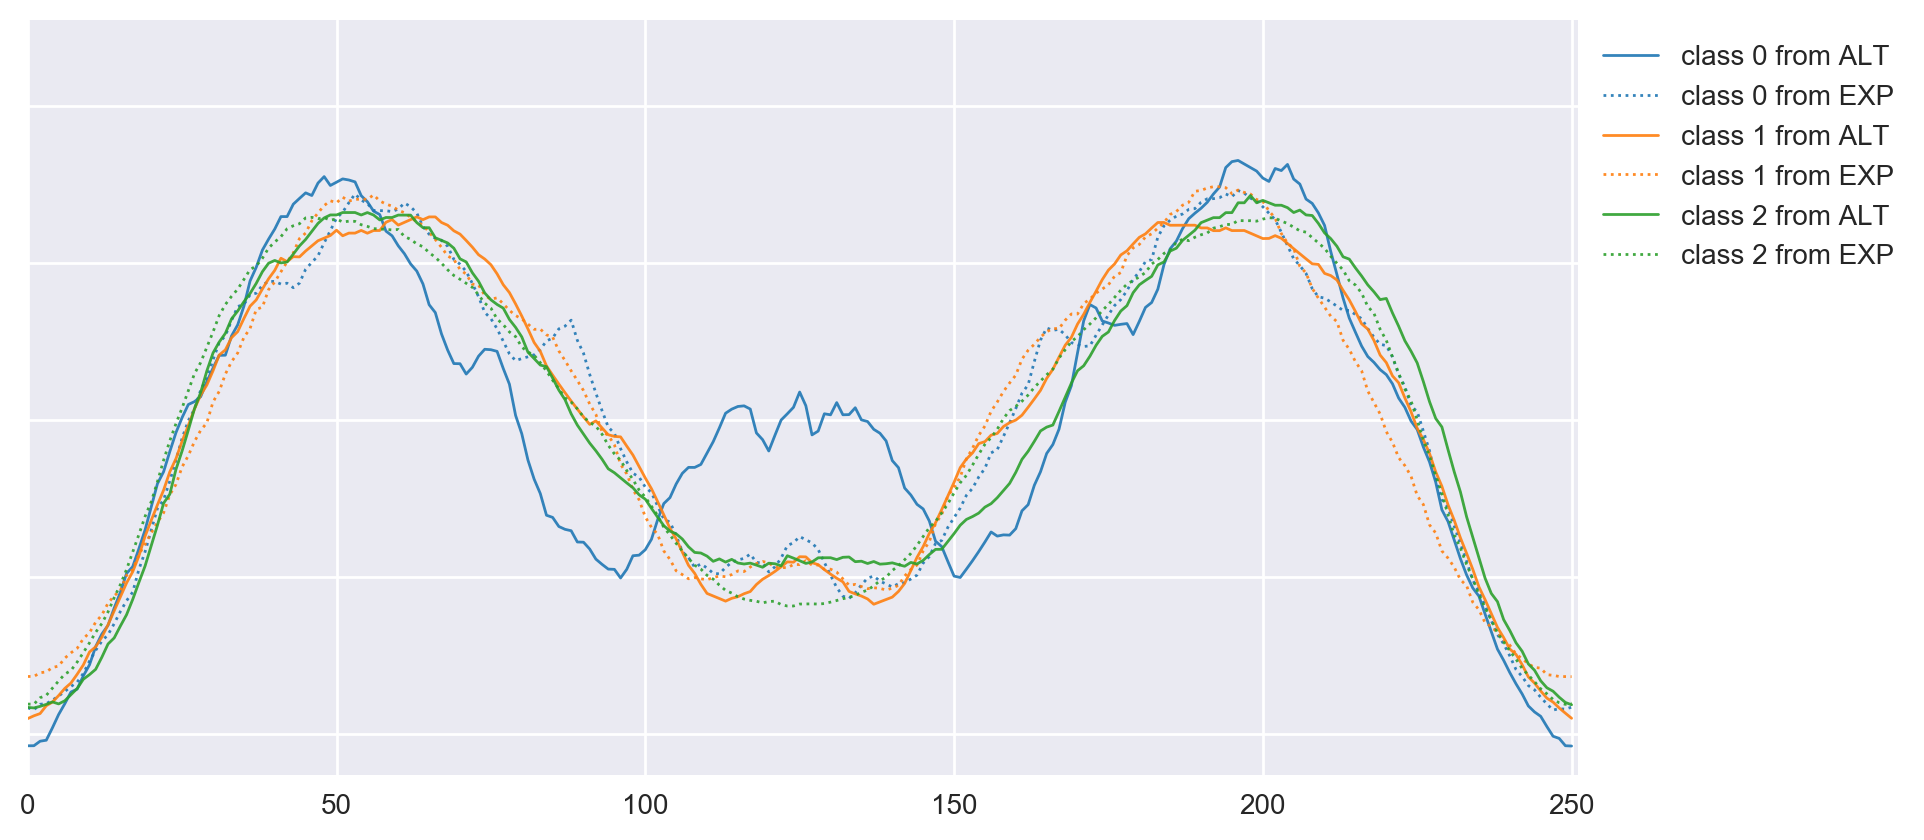

In [9]:
fig = plt.figure(figsize=(10,5), dpi=200)
ax = fig.add_subplot(1, 1, 1)
ax.yaxis.set_major_formatter(plt.NullFormatter())

for label in ORGdataset.class_dist.keys()[:20]:
    xaxis = np.arange(0,ORGdataset.T)
    l_data = ORGdataset.data[ORGdataset.labels == label]
    r_ind = np.random.randint(0,len(l_data))
    r_data = l_data[r_ind]
    plt.plot(xaxis, r_data, c=current_palette[int(label)], lw=1, ls='-', alpha=0.9, label='class {} from ALT'.format(int(label)))
    
    xaxis = np.arange(0,EXTdataset.T)
    l_data = EXTdataset.data[EXTdataset.labels == label]
    r_ind = np.random.randint(0,len(l_data))
    r_data = l_data[r_ind]
    plt.plot(xaxis, r_data, c=current_palette[int(label)], lw=1, ls=':', alpha=0.9, label='class {} from EXP'.format(int(label)))
plt.axis([0, ORGdataset.T, np.min(ORGdataset.data), np.max(ORGdataset.data)])    
legend = plt.legend(bbox_to_anchor=(1, 1))
plt.show()

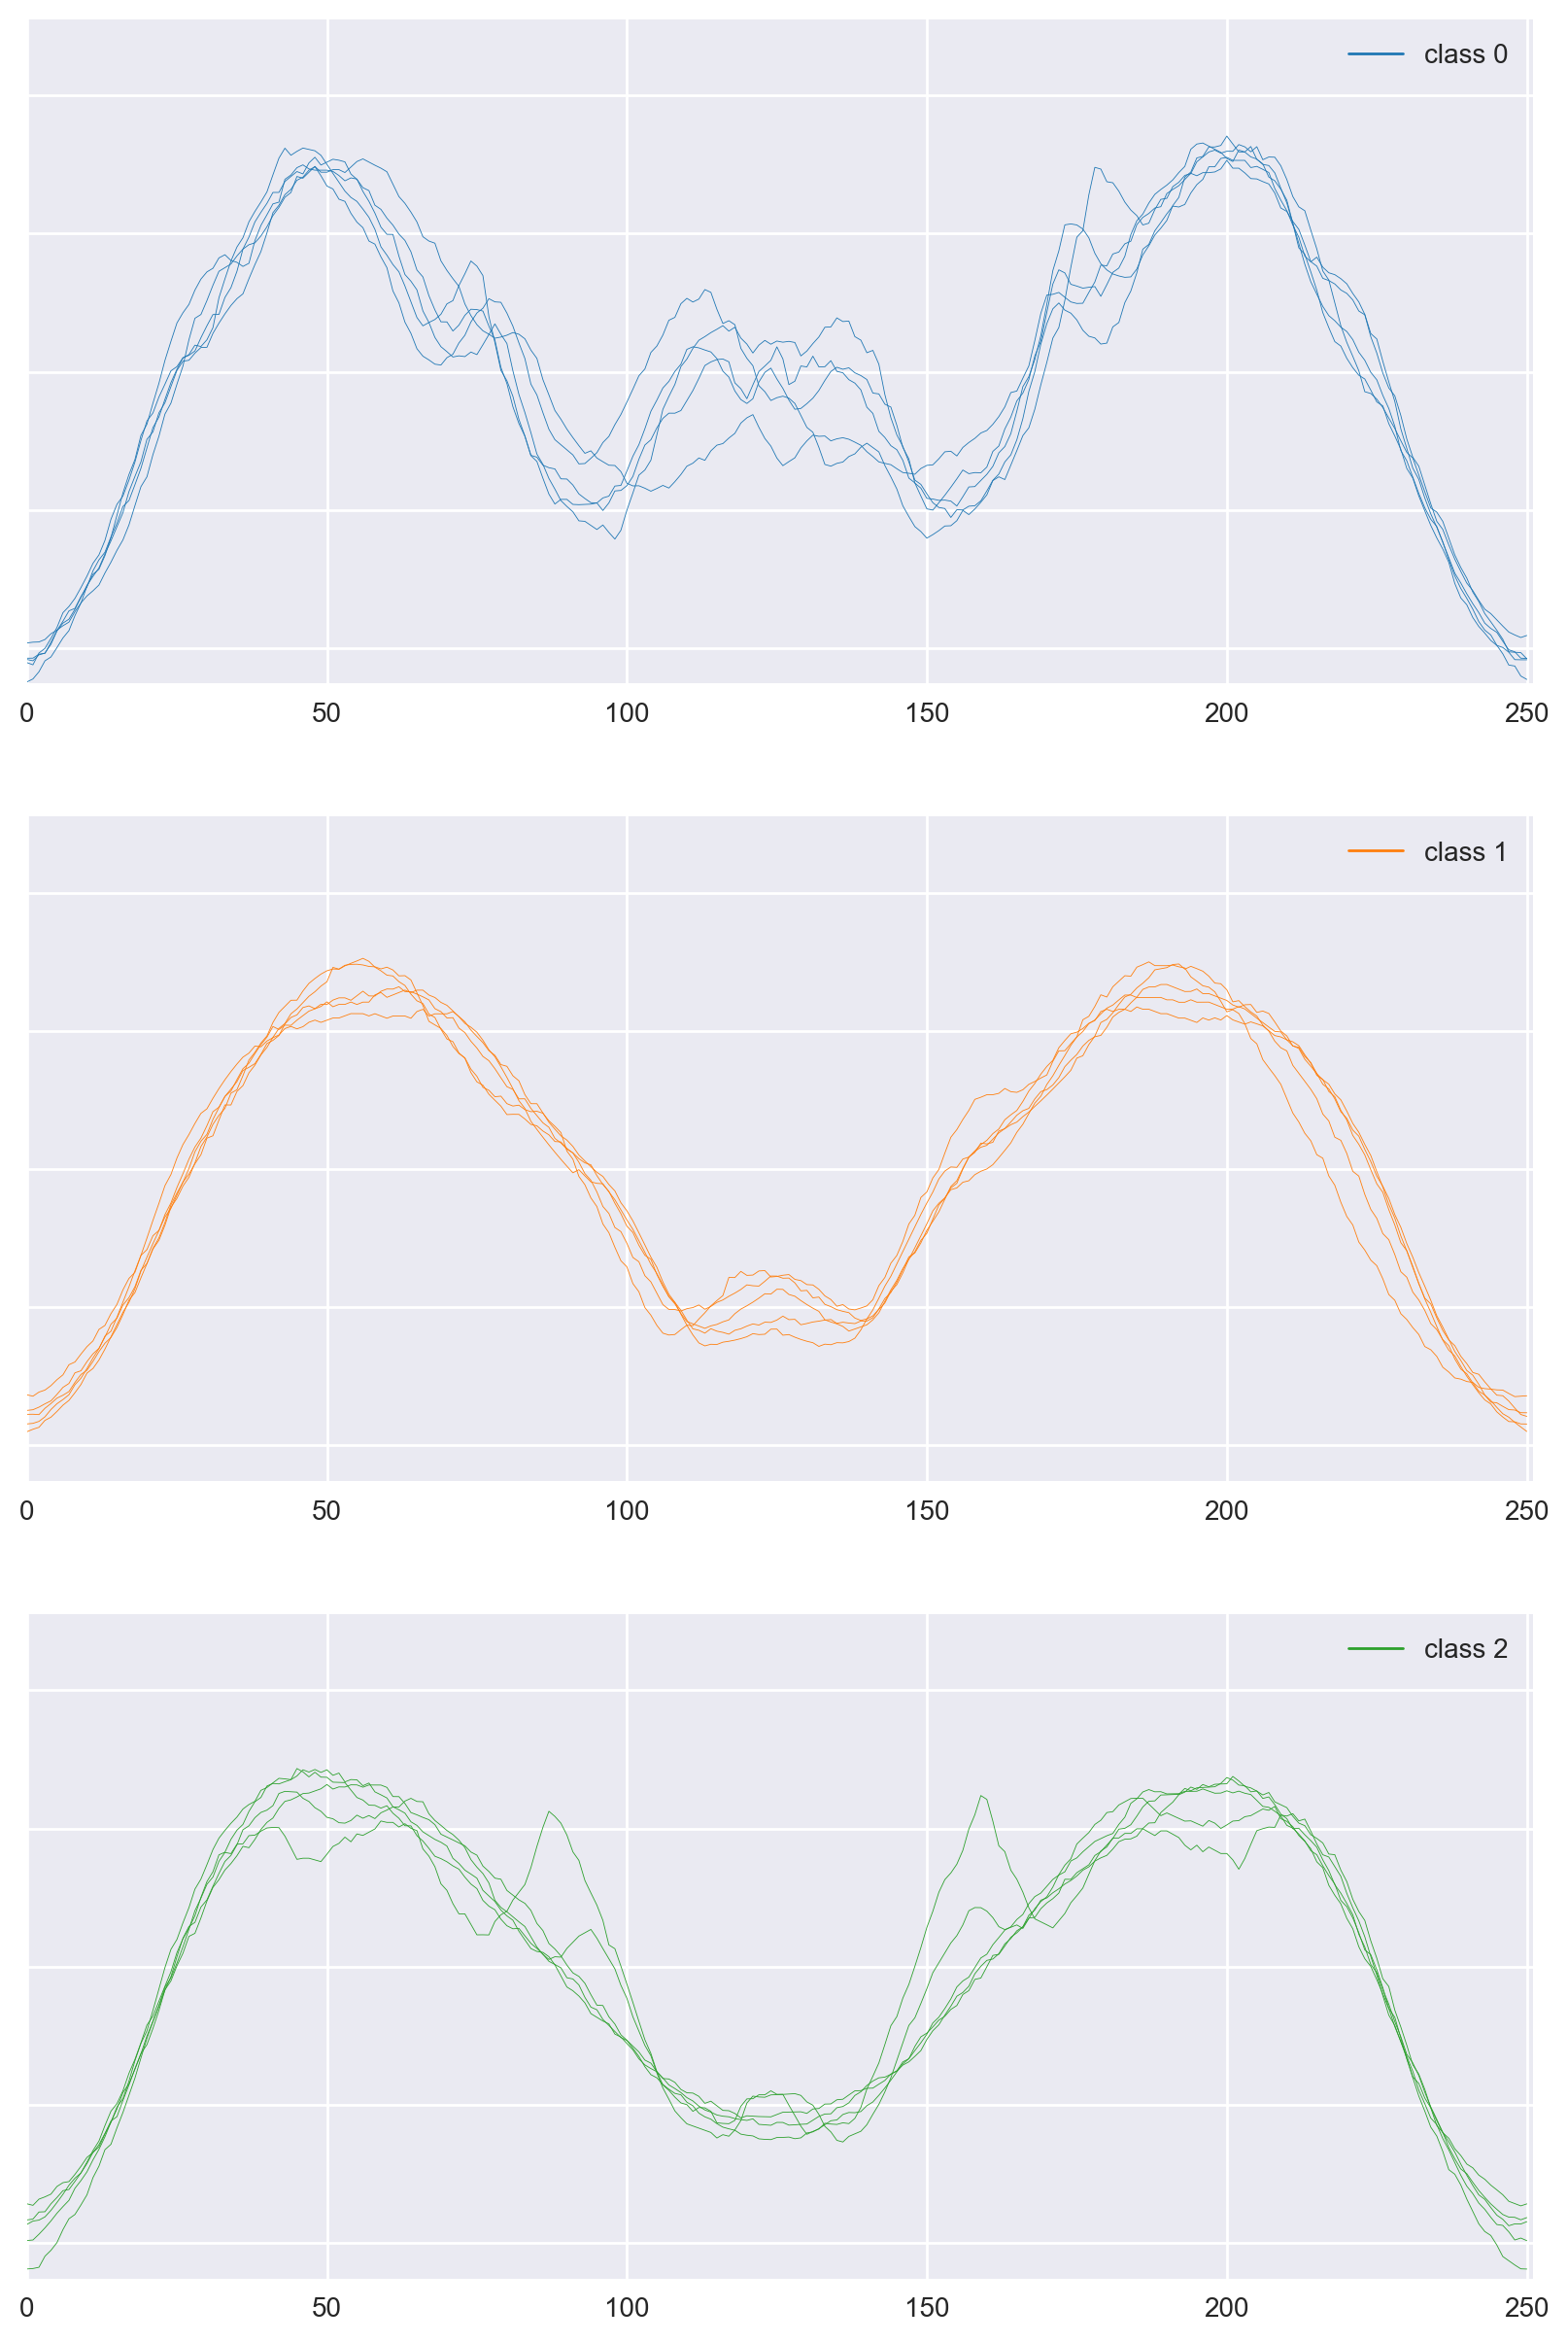

In [10]:
dataset = ORGdataset
xaxis = np.arange(0,dataset.T)

fig = plt.figure(2,figsize=(10,5*dataset.K),dpi=200)

fig.subplots_adjust(top=.9)
for i, label in enumerate(dataset.class_dist.keys()[:3]):
    ax = plt.subplot(dataset.K,1,i+1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    plt.plot(xaxis, dataset.data[dataset.labels == label].T[:,:5], c=current_palette[int(label)], alpha=1, lw=0.3)
    plt.plot([], [], c=current_palette[int(label)], alpha=1, lw=1, label='class {}'.format(int(label)))
    plt.axis([0, dataset.T, np.min(dataset.data), np.max(dataset.data)])
    plt.legend()
    
plt.show()

In [11]:
from spawn import *

100%|██████████| 3/3 [00:00<00:00, 2159.79it/s]


(2, array([ 0,  8, -1, -1,  8, -1, -1,  0, -1, -1, -1,  8]))


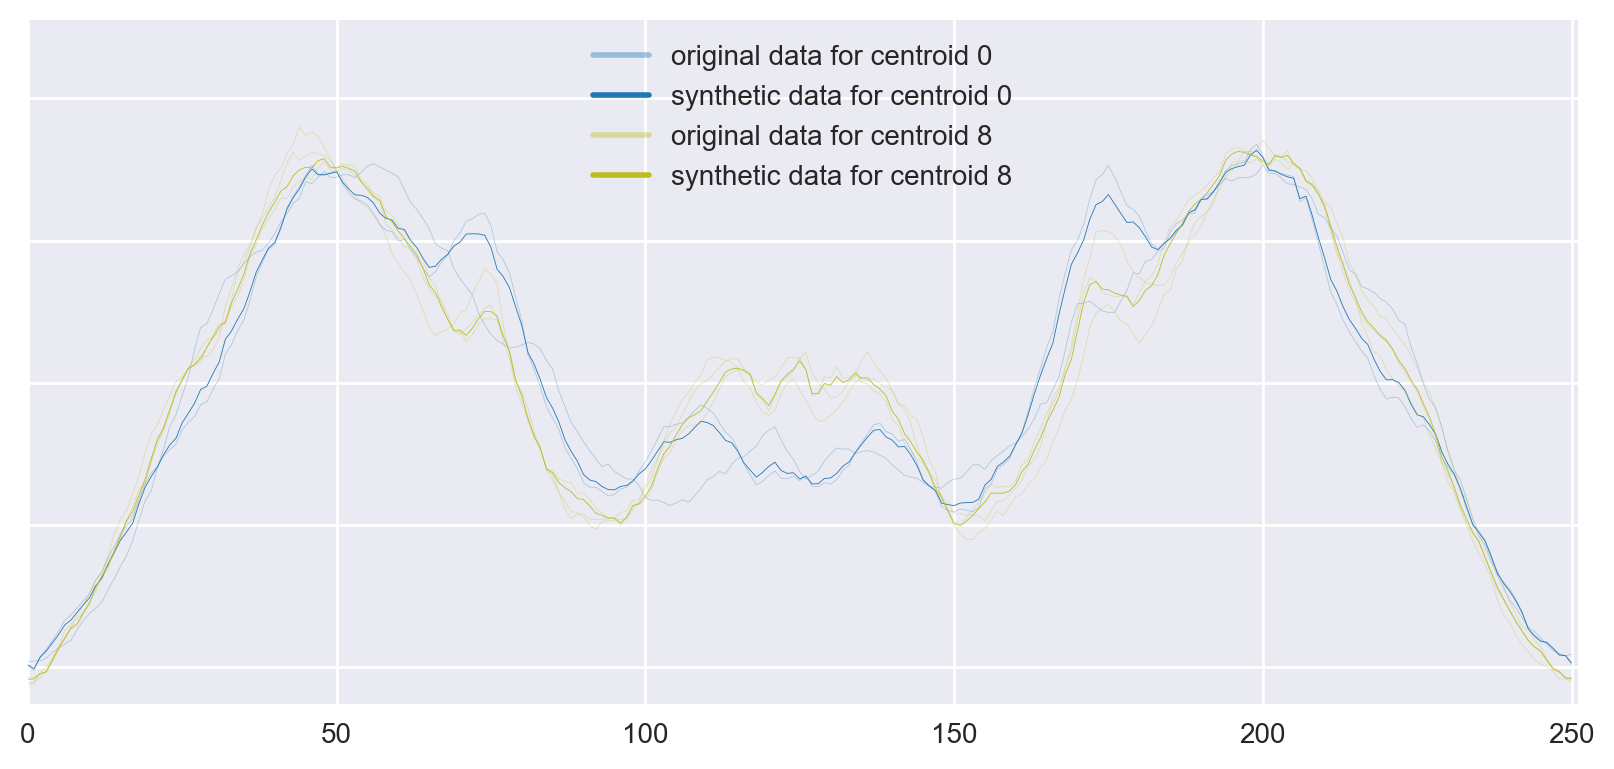

In [12]:
plt.figure(figsize=(10,5*dataset.K),dpi=200)
xaxis = np.arange(0,dataset.T)
plt.subplots_adjust(top=.9)

for i, label in enumerate(dataset.class_dist.keys()[:1]):
    l_data = dataset.data[dataset.labels==label]
    ax = plt.subplot(dataset.K*100+10+i+1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    new_clusters, alloc = create_new_data(l_data, 9, ssg_epochs=1, k=1)
    print(len(new_clusters), alloc)
    ci = 0
    for i in range(max(alloc)+1):
        if not l_data[alloc==i].size: continue
        plt.plot(xaxis, l_data[alloc==i].T, c=current_palette[i], alpha=0.3, lw=.3)
        plt.plot([],[], c=current_palette[i], alpha=0.4, lw=2, label='original data for centroid {}'.format(int(i)))
        plt.plot(xaxis, new_clusters[ci].T, c=current_palette[i], alpha=1, lw=0.3)
        plt.plot([],[], c=current_palette[i], alpha=1, lw=2, label='synthetic data for centroid {}'.format(int(i)))
        ci+=1
    plt.axis([0, dataset.T, np.min(dataset.data), np.max(dataset.data)])
    plt.legend()
plt.show()

In [13]:
len(current_palette)

10

100%|██████████| 1000/1000 [00:00<00:00, 5559.82it/s]


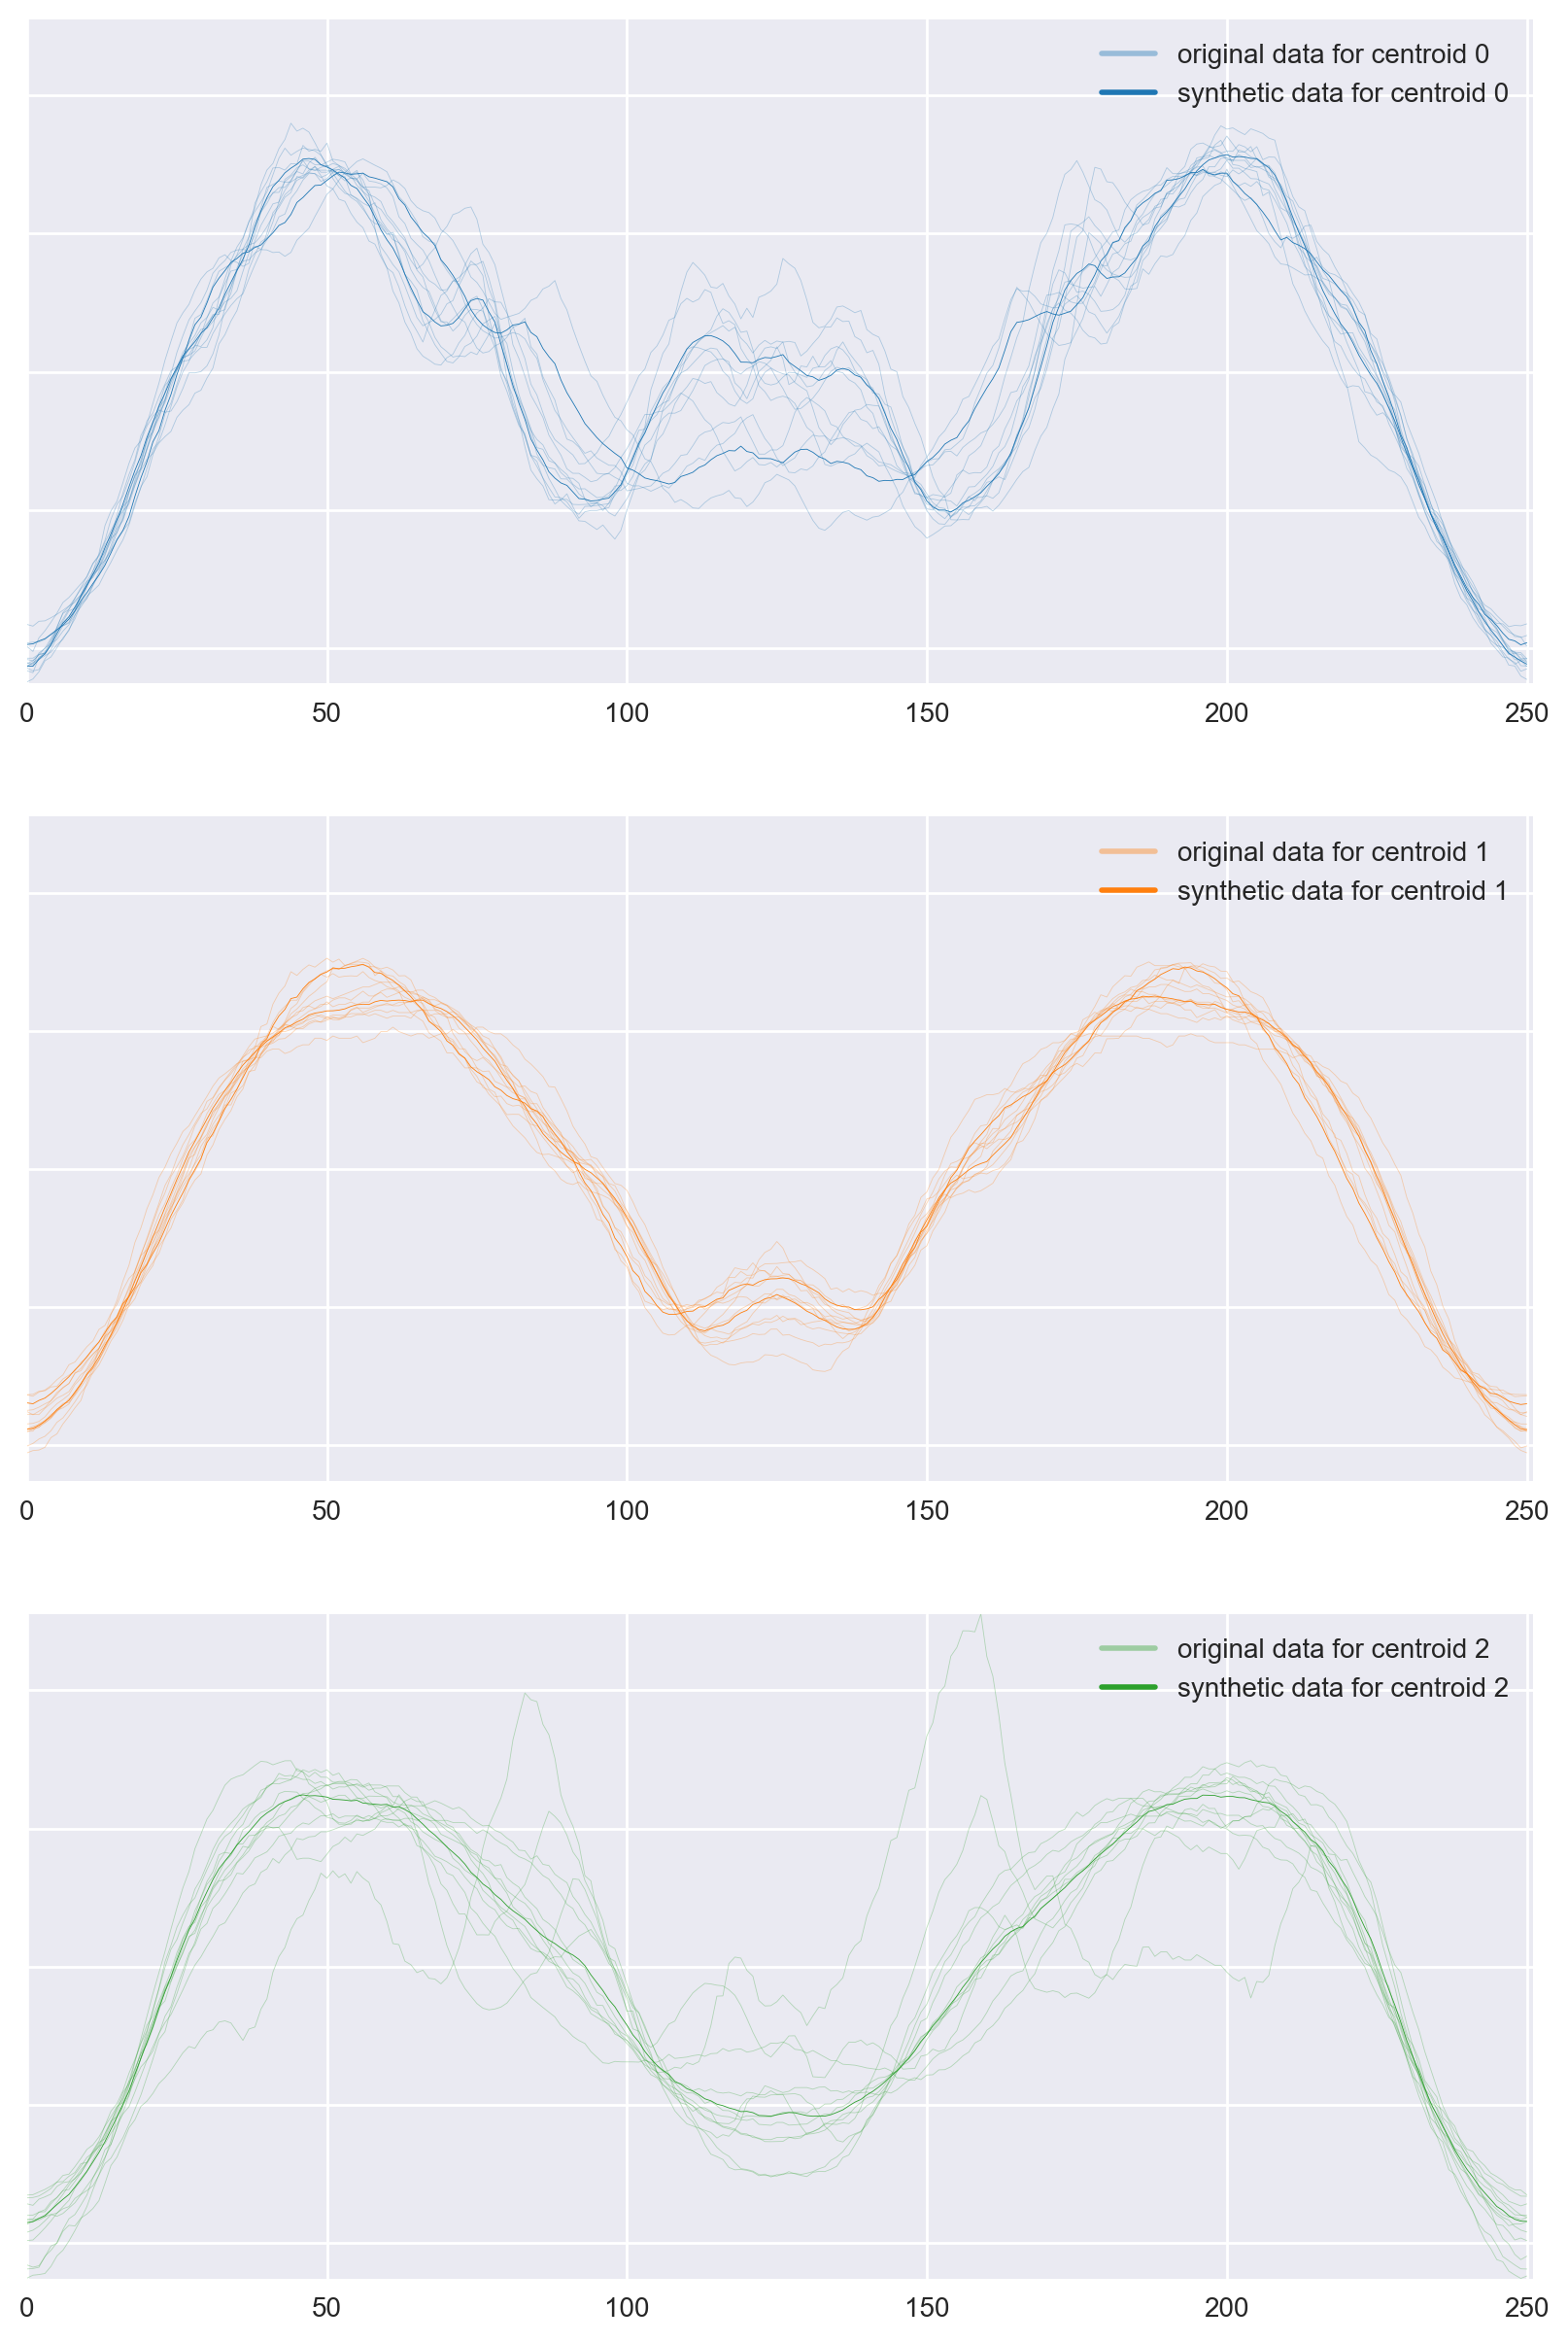

In [15]:
plt.figure(figsize=(10,5*3),dpi=200)
xaxis = np.arange(0,ORGdataset.T)
plt.subplots_adjust(top=.9)

for i, label in enumerate(ORGdataset.class_dist.keys()[:3]):
    l_data = ORGdataset.data[ORGdataset.labels==label]
    ax = plt.subplot(3*100+10+i+1)
    ax.yaxis.set_major_formatter(plt.NullFormatter())
    new_clusters, _ = create_new_data(l_data, 3)
    plt.plot(xaxis, l_data.T, c=current_palette[i], alpha=0.3, lw=.3)
    plt.plot([],[], c=current_palette[i], alpha=0.4, lw=2, label='original data for centroid {}'.format(int(i)))
    plt.plot(xaxis, new_clusters.T, c=current_palette[i], alpha=1, lw=0.3)
    plt.plot([],[], c=current_palette[i], alpha=1, lw=2, label='synthetic data for centroid {}'.format(int(i)))
    plt.axis([0, ORGdataset.T, np.min(ORGdataset.data), np.max(ORGdataset.data)])
    plt.legend()
plt.show()